In [1]:
import gym
from gym import spaces
from rljax.algorithm import DQN
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from environment import Env

In [2]:
data = pd.read_csv("SH_SDS_data_4.csv", index_col=0)
data.current_state = [('000'+str(cs))[-3:] for cs in data.current_state]
prob = pd.read_csv("SH_SDS_transition_matrix.csv", index_col=0)
prob.index = [('000'+str(idx))[-3:] for idx in prob.index]


In [3]:
def sniper(state_1, state_2, env, start_state):
    state = start_state
    done = False
    all_rewards = list()
    while not done:
        if state[0] == state_1:
            state, reward, done, _ = env.step(0)
        elif state[0] == state_2:
            state, reward, done, _ = env.step(1)
        else:
            state, reward, done, _ = env.step(2)
        all_rewards.append(reward)
    return all_rewards

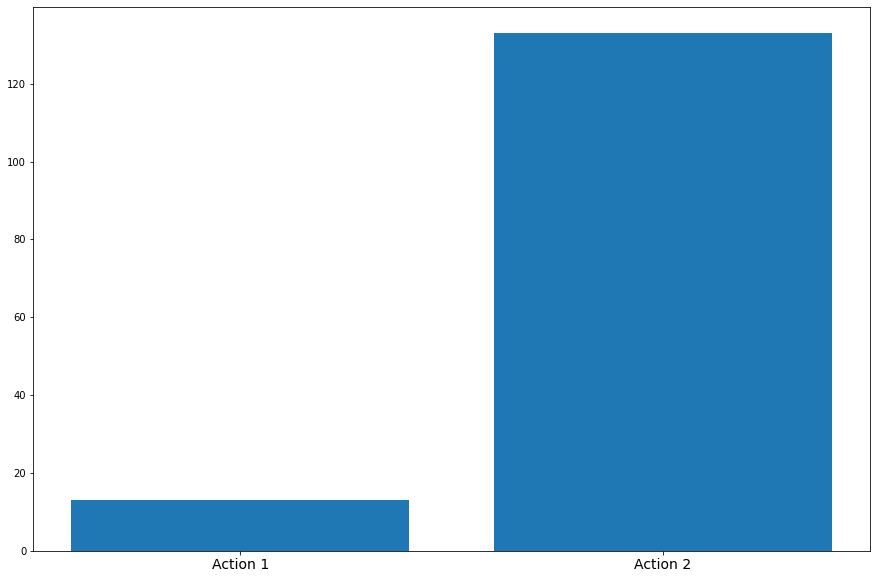

In [4]:
env = Env(data, prob, steps=2000)
mappings = env.mapping
sniper(mappings['121'], mappings['401'], env, env.reset())
sniper(mappings['122'], mappings['401'], env, env.reset())
env.summarize_state_decisions('401')

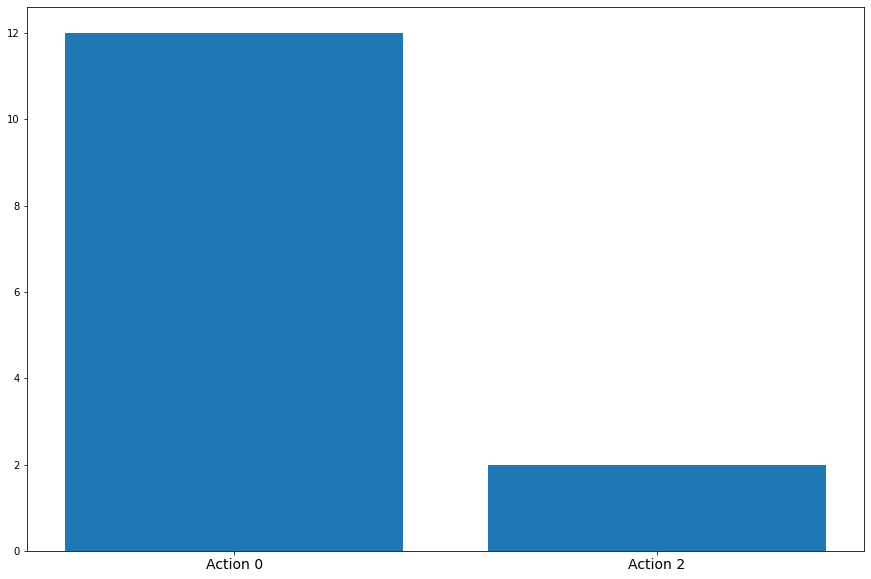

In [5]:
env.summarize_state_decisions('122')

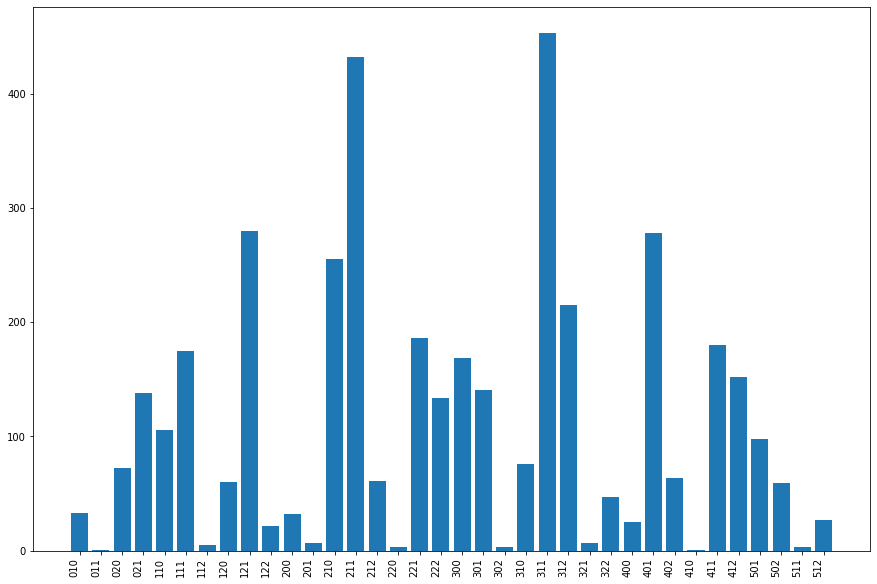

In [6]:
env.plot_state_frequency()


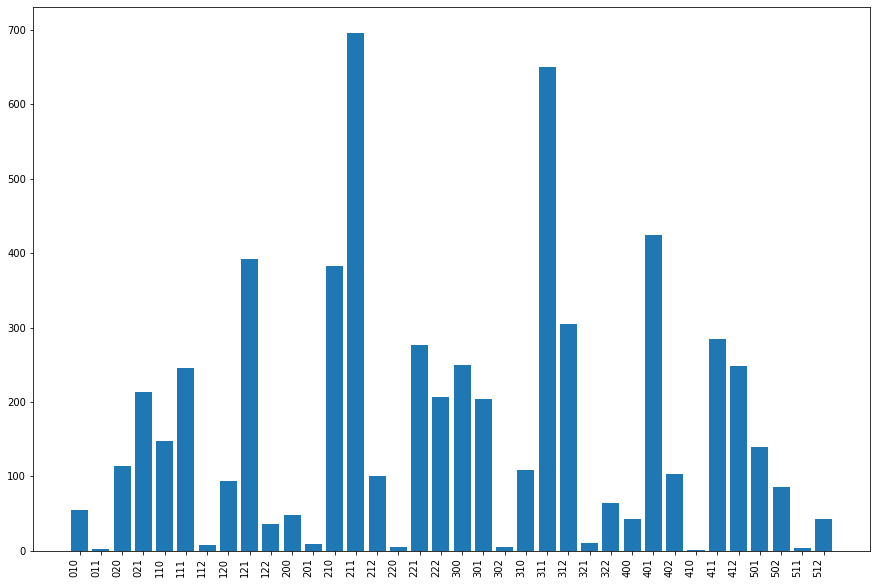

In [7]:
env.plot_state_frequency()

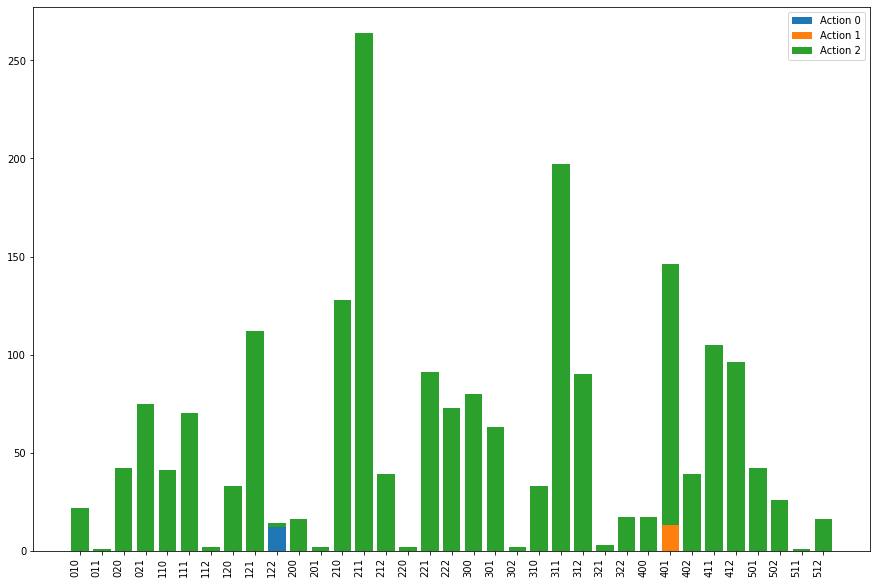

In [8]:
env.summarize_decisions()

In [9]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 5000
SEED = 0

env = Env(data, prob, steps=2340)
env_test = Env(data, prob, steps=2340)

algo = DQN(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.state_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=0,
    loss_type="l2",
    lr=1e-3,
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=1000,
    seed=SEED,
)
trainer.train()

Num steps: 1000     Return: 866.3   Time: 0:00:45
Num steps: 2000     Return: 89233.4   Time: 0:01:33
Num steps: 3000     Return: 100400.2   Time: 0:02:26
Num steps: 4000     Return: 92343.8   Time: 0:03:15
Num steps: 5000     Return: 60616.2   Time: 0:04:06


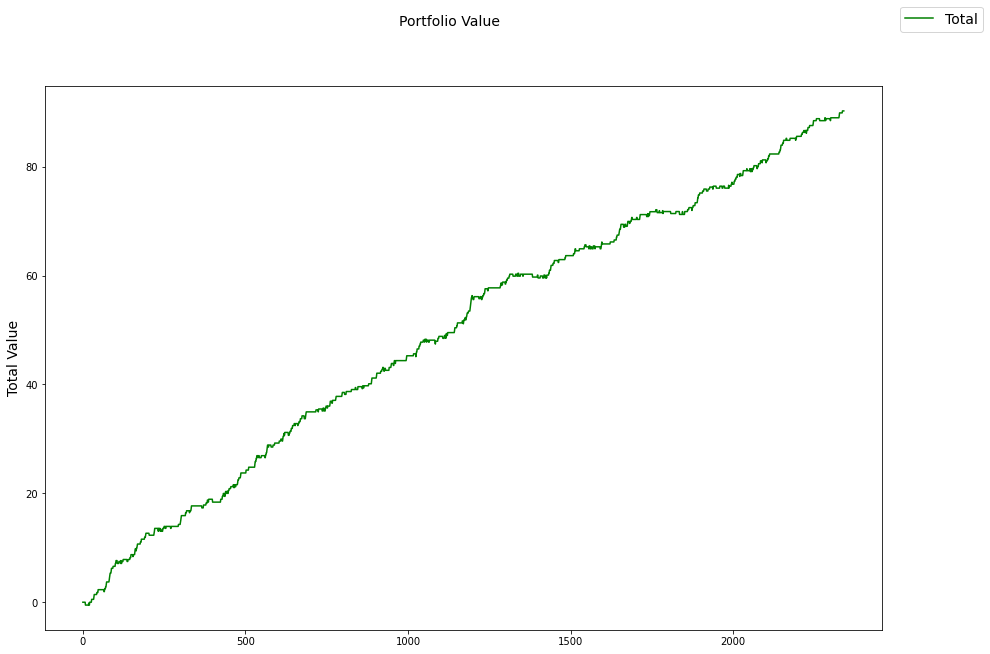

In [10]:
env.plot()

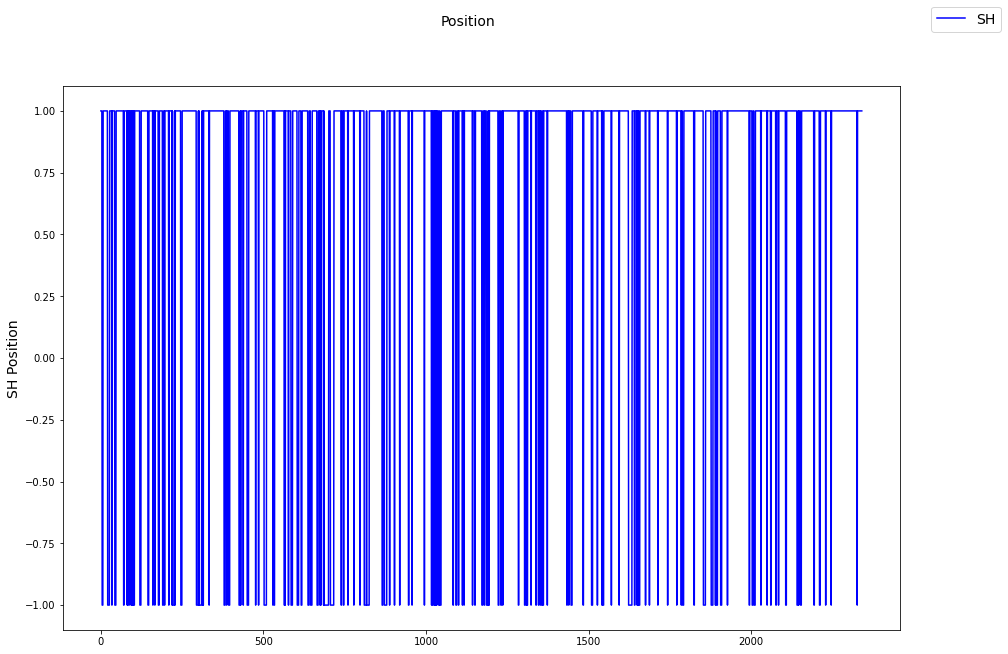

In [11]:
env.plot('position_history')

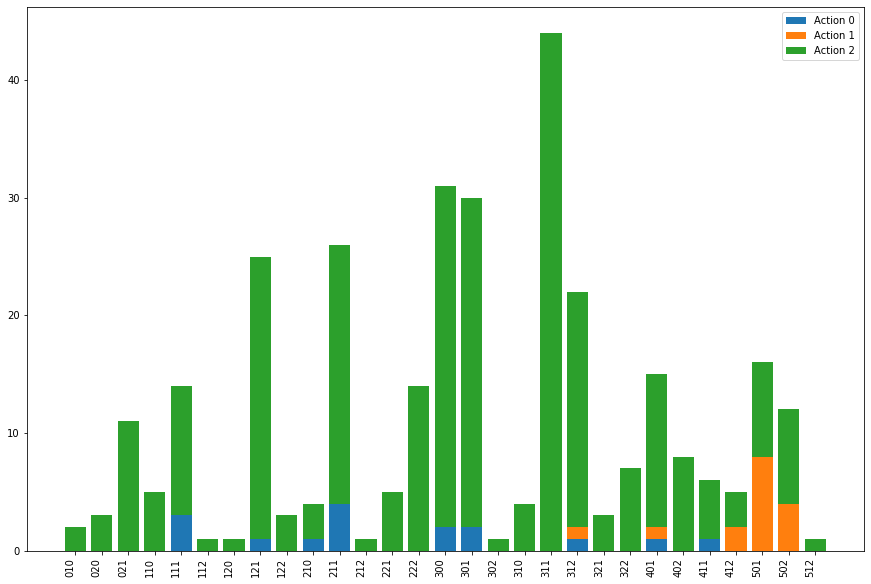

In [12]:
env.summarize_decisions()